 **GLOBAL PUBLIC HEALTH INDICATORS**

WHY WE CHOSE THIS?
* health is the most fundamental measure of a society’s well-being.
* huge inequality still exists between countries.
* understanding disease patterns shows where the world is progressing and where it is failing.
* many diseases are preventable, yet millions still die.
* data shows truths that governments often hide or underplay.
* health outcomes reflect social justice.



DATA PREPROCESSING
* clean datasets
* same year align
* missing values removed
* only valid countries kept
* handled GDP outliers


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
life = pd.read_csv("/kaggle/input/global-public-health-indicators/life-expectancy.csv")
infant = pd.read_csv("/kaggle/input/global-public-health-indicators/child-mortality.csv")
gdp = pd.read_csv("/kaggle/input/global-public-health-indicators/gdp-per-capita-maddison-project-database.csv")
regions=pd.read_csv("/kaggle/input/global-public-health-indicators/continents-according-to-our-world-in-data.csv")
gdp=gdp.drop(columns=["900793-annotations"])
gdp.isna().sum()
# life.isna().sum()
# infant.isna().sum()
gdp.head(100)
regions.isna().sum()
gdp
life
infant



,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76
...,...,...,...,...
16830,Zimbabwe,ZWE,2019,5.11
16831,Zimbabwe,ZWE,2020,5.01
16832,Zimbabwe,ZWE,2021,4.76
16833,Zimbabwe,ZWE,2022,4.60


In [117]:
# Life expectancy
life_countries = life[life['Code'].notna()].reset_index(drop=True)

# Infant mortality
infant_countries = infant[infant['Code'].notna()].reset_index(drop=True)

#GDP per Capita
gdp_countries = gdp[gdp['Code'].notna()].reset_index(drop=True)

#for regions

regions = regions.rename(columns={
    "World regions according to OWID": "Region"
})

for df in [life_countries,infant_countries,gdp_countries]:
    df.drop(columns=["Code"],inplace=True)



In [118]:
infant_countries

,Entity,Year,Child mortality rate
0,Afghanistan,1957,37.13
1,Afghanistan,1958,36.52
2,Afghanistan,1959,35.95
3,Afghanistan,1960,35.32
4,Afghanistan,1961,34.76
...,...,...,...
16212,Zimbabwe,2019,5.11
16213,Zimbabwe,2020,5.01
16214,Zimbabwe,2021,4.76
16215,Zimbabwe,2022,4.60


**QUES1:  How strongly do income levels correlate with life expectancy and infant mortality across regions? Are there outlier countries that perform better or worse than expected given their income?**


In [119]:
country_data = gdp_countries.merge(life_countries, on=['Entity','Year'])
country_data = country_data.merge(infant_countries, on=['Entity','Year'])

regional_data = country_data.merge(regions[['Entity','Region']], on='Entity', how='left')


In [120]:
regional_avg = regional_data.groupby(['Region']).agg({    'GDP per capita': 'median',
    'Period life expectancy at birth': 'median',
    'Child mortality rate': 'median'
}).reset_index()

country_avg=country_data.groupby(['Entity']).agg({
 'GDP per capita': 'mean',
    'Period life expectancy at birth': 'mean',
    'Child mortality rate': 'mean'
}).reset_index()


region_corr = regional_avg[['GDP per capita',
                           'Period life expectancy at birth',
                           'Child mortality rate']].corr()
print(region_corr)

                                 GDP per capita  \
GDP per capita                         1.000000   
Period life expectancy at birth        0.743137   
Child mortality rate                  -0.710858   

                                 Period life expectancy at birth  \
GDP per capita                                          0.743137   
Period life expectancy at birth                         1.000000   
Child mortality rate                                   -0.996479   

                                 Child mortality rate  
GDP per capita                              -0.710858  
Period life expectancy at birth             -0.996479  
Child mortality rate                         1.000000  


| Pairs                             | Correlation | Meaning                                |
|----------------------------------|-------------|----------------------------------------|
| GDP per capita ↔ Life Expectancy  | +0.74       | Higher income → longer lifespan        |
| GDP per capita ↔ Child Mortality  | −0.71       | Higher income → lower child mortality  |
| Life Expectancy ↔ Child Mortality | −0.99       | Very strong inverse relationship       |


**GDP per Capita vs Life Expectancy → Strong positive correlation****

As GDP increases, countries invest more in:

* hospitals, doctors, infrastructure

* medicines and technology

* sanitation and clean water
  >      People live longer.

**GDP per Capita vs Child Mortality → Strong negative correlation**

Richer countries provide:

* better maternal healthcare

* good nutrition for children

* strong vaccination programs
    >  Child deaths drastically reduce.

**Life Expectancy vs Child Mortality → Very strong negative correlation (−0.996)**

Extremely high dependency:

* If child mortality falls → life expectancy shoots up

* If child mortality rises → life expectancy collapses
      Child health defines overall population survival.

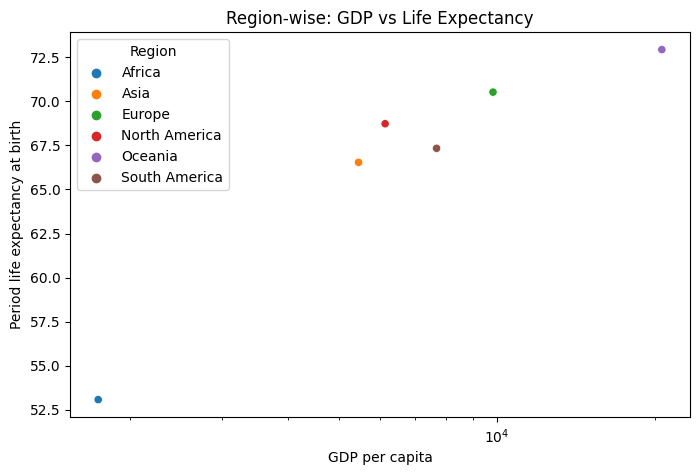

In [121]:

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=regional_avg,
    x='GDP per capita',
    y='Period life expectancy at birth',
    hue='Region'
)
plt.xscale('log')
plt.title("Region-wise: GDP vs Life Expectancy")
plt.show()


**Region-wise: GDP vs Life Expectancy**

**Insight**

Higher GDP regions like Oceania, Europe & North America have the highest life expectancy (70–75 years).

Africa, with the lowest GDP, has life expectancy around 53 years — the lowest among all regions.

Asia & South America fall in the middle cluster, showing improving healthcare outcomes with increasing income.

> This shows a direct positive correlation:

Higher GDP → Better healthcare → Longer life expectancy

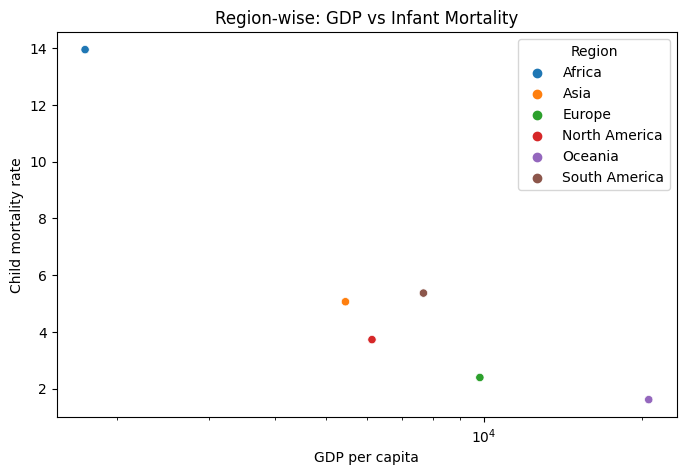

In [122]:


plt.figure(figsize=(8,5))
sns.scatterplot(
    data=regional_avg,
    x='GDP per capita',
    y='Child mortality rate',
    hue='Region'
)
plt.xscale('log')
plt.title("Region-wise: GDP vs Infant Mortality")
plt.show()



**Region-wise: GDP vs Child Mortality Rate**

**Insight**

Child mortality rate drops drastically with increasing GDP.

Africa has the highest child mortality despite low GDP.

Europe & Oceania show the lowest mortality levels, reflecting strong maternal & child healthcare facilities.

> The correlation here is strongly negative:

Higher GDP → Lower child mortality

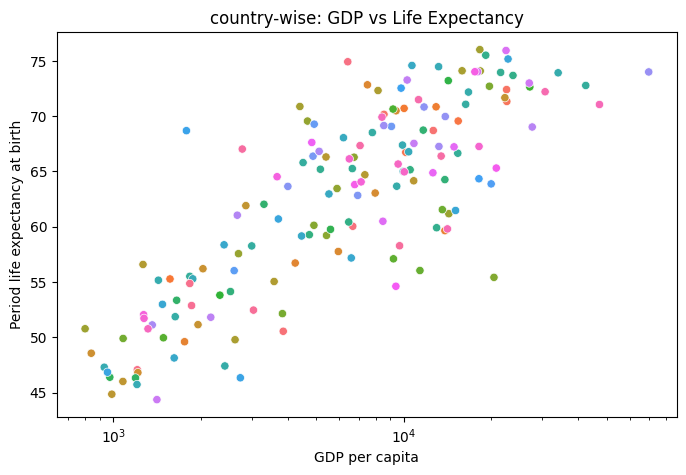

In [123]:

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=country_avg,
    x='GDP per capita',
    y='Period life expectancy at birth',
    hue='Entity'
)
plt.xscale('log')
plt.title("country-wise: GDP vs Life Expectancy")
plt.legend([],[], frameon=False)
plt.show()


**Country-wise: GDP vs Life Expectancy**

**Insight**

The scatter is more widely spread compared to region-level plot → inequality across countries.

High-income countries cluster around 70–80 years, but…

Some countries with a moderately high GDP enjoy very good life expectancy, meaning strong public health policy.

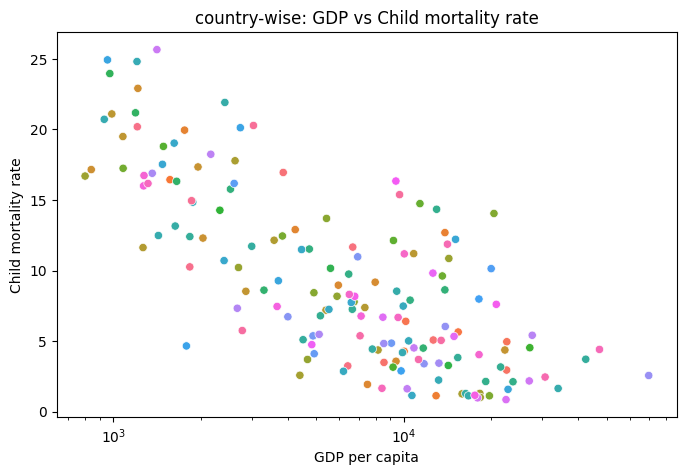

In [124]:

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=country_avg,
    x='GDP per capita',
    y='Child mortality rate',
    hue='Entity'
)
plt.xscale('log')
plt.title("country-wise: GDP vs Child mortality rate")
plt.legend([],[], frameon=False)
plt.show()

**Country-wise: GDP vs Child Mortality Rate**

**Insight**

Child mortality still remains lower in some low-GDP countries; hence, targeted health interventions remain effective.

While a few countries with moderate GDP still have inequality in resource distribution.


In [125]:
country_avg.sort_values(by=["Child mortality rate"], ascending=False).tail(5)
country_avg.sort_values(by=["Child mortality rate"], ascending=False).head(5)

,Entity,GDP per capita,Period life expectancy at birth,Child mortality rate
131,Sierra Leone,1412.871428,44.379099,25.662687
107,Niger,954.587970,46.855373,24.935714
91,Mali,1206.499003,45.746746,24.819048
60,Guinea,972.485125,46.405821,23.964932
20,Burkina Faso,1214.996822,46.820449,22.917123


In [126]:
country_avg.sort_values(by=["Period life expectancy at birth"], ascending=False).head(5)
country_avg.sort_values(by=["Period life expectancy at birth"], ascending=False).tail(5)

,Entity,GDP per capita,Period life expectancy at birth,Child mortality rate
61,Guinea-Bissau,1192.230447,46.337875,21.184521
26,Central African Republic,1078.820870,46.022392,19.501250
91,Mali,1206.499003,45.746746,24.819048
27,Chad,988.018823,44.869959,21.103425
131,Sierra Leone,1412.871428,44.379099,25.662687


In [127]:
df_grouped = country_avg.copy()

df_grouped["gdp_group"] = pd.qcut(df_grouped["GDP per capita"], q=5, labels=[
    "Very Low Income",
    "Low Income",
    "Middle Income",
    "Upper Middle Income",
    "High Income"
])
group_stats = df_grouped.groupby("gdp_group", observed=False).agg({
    "Period life expectancy at birth": "mean",
    "Child mortality rate": "mean"
}).reset_index()

df_grouped = df_grouped.merge(group_stats, on="gdp_group", suffixes=("", "_expected"))

df_grouped["life_diff"] = df_grouped["Period life expectancy at birth"] - df_grouped["Period life expectancy at birth_expected"]
df_grouped["child_diff"] = df_grouped["Child mortality rate_expected"] - df_grouped["Child mortality rate"]  
# child_diff positive = better than expected
df_grouped["health_score"] = df_grouped["life_diff"] + df_grouped["child_diff"]
positive_outliers = df_grouped.sort_values("health_score", ascending=False).head(10)
negative_outliers = df_grouped.sort_values("health_score").head(10)
positive_outliers
# negative_outliers

,Entity,GDP per capita,Period life expectancy at birth,Child mortality rate,gdp_group,Period life expectancy at birth_expected,Child mortality rate_expected,life_diff,child_diff,health_score
109,North Korea,1785.335858,68.686318,4.655758,Very Low Income,51.042083,17.395831,17.644236,12.740073,30.384309
36,Cuba,4390.401725,70.869859,2.576133,Low Income,59.440935,10.747280,11.428924,8.171147,19.600071
42,Dominica,4664.827714,69.553937,3.697778,Low Income,59.440935,10.747280,10.113002,7.049503,17.162504
114,Palestine,4918.687796,69.272815,4.102917,Low Income,59.440935,10.747280,9.831880,6.644364,16.476243
138,Sri Lanka,4825.798068,67.621558,4.749041,Low Income,59.440935,10.747280,8.180623,5.998239,14.178862
1,Albania,6418.574409,74.914042,3.239111,Middle Income,64.964775,7.166788,9.949267,3.927677,13.876944
98,Montenegro,10676.962508,74.578231,1.146154,Upper Middle Income,66.532242,6.933569,8.045989,5.787415,13.833404
16,Bosnia and Herzegovina,7503.030481,72.829160,1.928810,Middle Income,64.964775,7.166788,7.864384,5.237979,13.102363
125,Saint Lucia,5115.071505,66.817162,5.477397,Low Income,59.440935,10.747280,7.376227,5.269883,12.646110
92,Malta,13193.107726,74.469641,2.236164,Upper Middle Income,66.532242,6.933569,7.937399,4.697405,12.634804


**Positive Outliers (better health outcomes than expected)**

Examples
North Korea, Cuba, Dominica, Palestine, Sri Lanka

These countries are overperforming relative to their income → strong community health systems.

**Negative Outliers (worse health outcomes than expected)**

Examples
Equatorial Guinea, Liberia, Nigeria, Sweden, France

These countries show policy gaps or unequal healthcare access, despite economic advantages.

**QUES2:Which diseases contribute most to mortality globally, and how does this vary by region (e.g., infectious diseases in developing nations vs. chronic diseases in developed nations)?**

In [128]:
death_1980_1993 = pd.read_csv("/kaggle/input/global-public-health-indicators/IHME-GBD_2023_DATA-e78625dc-1.csv")
death_1994_2022 = pd.read_csv("/kaggle/input/global-public-health-indicators/IHME-GBD_2023_DATA-b36b69f4-1.csv")
specific_cause_data=pd.read_csv("/kaggle/input/global-public-health-indicators/IHME-GBD_2023_DATA-71172ff2-1.csv")
cause_of_death_data = pd.concat(
    [death_1980_1993, death_1994_2022,specific_cause_data],
    ignore_index=True
)
cause_of_death_data = cause_of_death_data.rename(columns={
    'location': 'Entity',
    'year':'Year'
})

country_filtered = country_data[
    (country_data['Year'] >= 1980) & (country_data['Year'] <= 2022)
]

print(country_filtered.columns)
print(cause_of_death_data.columns)
cause_of_death_data
final_merged_data = pd.merge(
    country_filtered,
    cause_of_death_data,
    on=['Entity', 'Year'],
    how='inner'
)

final_merged_data

Index(['Entity', 'Year', 'GDP per capita', 'Period life expectancy at birth',
       'Child mortality rate'],
      dtype='object')
Index(['measure', 'Entity', 'sex', 'age', 'cause', 'metric', 'Year', 'val',
       'upper', 'lower'],
      dtype='object')


,Entity,Year,GDP per capita,Period life expectancy at birth,Child mortality rate,measure,sex,age,cause,metric,val,upper,lower
0,Afghanistan,1980,1019.0000,39.2581,24.57,Deaths,Both,All ages,Measles,Number,21489.799322,31810.675895,11916.480021
1,Afghanistan,1980,1019.0000,39.2581,24.57,Deaths,Both,All ages,Malaria,Number,251.657386,821.937134,28.273504
2,Afghanistan,1980,1019.0000,39.2581,24.57,Deaths,Both,All ages,Dengue,Number,0.038926,0.111954,0.012331
3,Afghanistan,1980,1019.0000,39.2581,24.57,Deaths,Both,All ages,Liver cancer,Number,261.625590,435.341462,170.318433
4,Afghanistan,1980,1019.0000,39.2581,24.57,Deaths,Both,All ages,Alzheimer's disease and other dementias,Number,684.121231,1850.495436,160.342298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106874,Zimbabwe,2022,1703.5294,62.3601,4.60,Deaths,Both,All ages,HIV/AIDS,Number,20562.597685,27952.602501,13549.075951
106875,Zimbabwe,2022,1703.5294,62.3601,4.60,Deaths,Both,All ages,Stroke,Number,7229.281885,9233.732163,5500.121399
106876,Zimbabwe,2022,1703.5294,62.3601,4.60,Deaths,Both,All ages,Asthma,Number,1647.518203,2405.018721,1087.018600
106877,Zimbabwe,2022,1703.5294,62.3601,4.60,Deaths,Both,All ages,COVID-19,Number,6578.620960,7528.429642,5804.344621


In [129]:
df_deaths = final_merged_data[
    (final_merged_data['measure'] == 'Deaths') &
    (final_merged_data['metric'] == 'Number')
]

global_top_causes = (
    df_deaths.groupby("cause")["val"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

global_top_causes


cause
All causes                5.582112e+08
Ischemic heart disease    2.160651e+08
Stroke                    2.138581e+08
Tuberculosis              6.217534e+07
Diabetes mellitus         3.717133e+07
Name: val, dtype: float64

In [130]:
df = final_merged_data[
    (final_merged_data["measure"] == "Deaths") &
    (final_merged_data["metric"] == "Number")
]
df2 = df[df["cause"] != "All causes"]

yearly_cause = (
    df2.groupby(["Year", "cause"])["val"]
       .sum()
       .reset_index()
)

yearly_top = (
    yearly_cause.sort_values(["Year", "val"], ascending=[True, False])
                .groupby("Year")
                .head(1)
)

yearly_top

,Year,cause,val
14,1980,Stroke,4.534452e+06
30,1981,Stroke,4.506011e+06
46,1982,Stroke,4.493257e+06
62,1983,Stroke,4.539732e+06
78,1984,Stroke,4.521649e+06
94,1985,Stroke,4.510730e+06
110,1986,Stroke,4.485868e+06
126,1987,Stroke,4.505705e+06
142,1988,Stroke,4.574628e+06
158,1989,Stroke,4.627375e+06


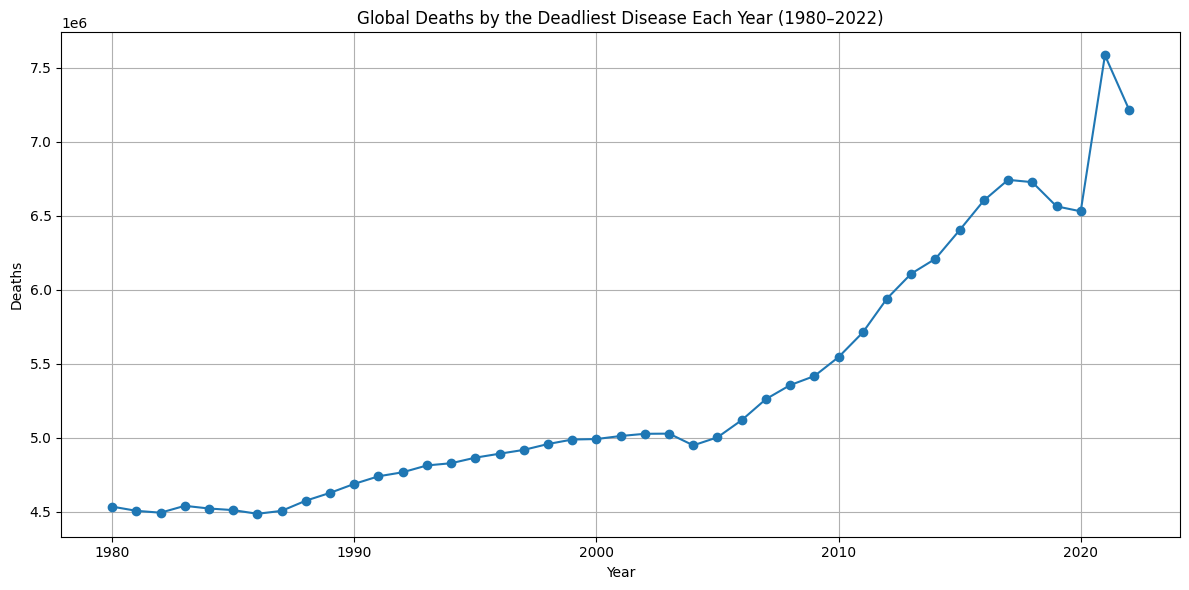

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(yearly_top["Year"], yearly_top["val"], marker='o')
plt.title("Global Deaths by the Deadliest Disease Each Year (1980–2022)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


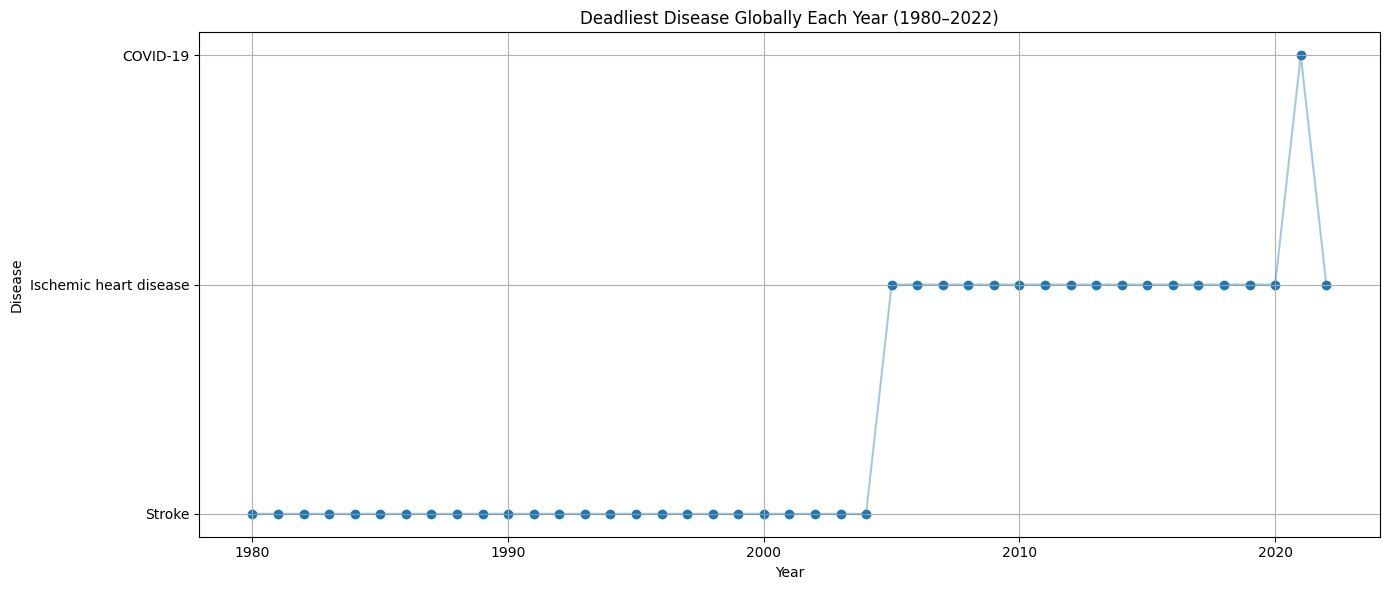

In [132]:
plt.figure(figsize=(14,6))
plt.scatter(yearly_top["Year"], yearly_top["cause"])
plt.plot(yearly_top["Year"], yearly_top["cause"], alpha=0.4)
plt.title("Deadliest Disease Globally Each Year (1980–2022)")
plt.xlabel("Year")
plt.ylabel("Disease")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Here Overall Trend Summary

| Period      | Deadliest Disease          | Why                                      |
|-------------|-----------------------------|-------------------------------------------|
| 1980–2004   | Stroke                      | High global hypertension, aging population |
| 2005–2020   | Ischemic Heart Disease (IHD)| Lifestyle diseases dominate                |
| 2021        | COVID-19                    | Pandemic mortality spike                  |
| 2022        | Ischemic Heart Disease (IHD)| COVID decline, chronic disease dominance   |


**Conclusion**

Stroke dominated global deaths from 1980 to the early 2000s. However, from 2005 onward, Ischemic Heart Disease overtook Stroke and became the leading global cause of death, reflecting the worldwide shift toward chronic, lifestyle-driven diseases. In 2021, COVID-19 temporarily became the deadliest cause globally, but by 2022, IHD returned as the top killer. This aligns perfectly with official IHME global disease burden trends.

In [133]:
final_df = final_merged_data.merge(
    df_grouped[["Entity", "gdp_group"]],
    on="Entity",
    how="left"
)
cause_by_gdp = (
    final_df[
        (final_df["measure"] == "Deaths") &
        (final_df["metric"] == "Number") &
        (final_df["cause"] != "All causes")
    ]
    .groupby(["gdp_group", "cause"], observed=False)["val"]
    .sum()
    .reset_index()
)

top5_by_group = (
    cause_by_gdp.sort_values(["gdp_group", "val"], ascending=[True, False])
                .groupby("gdp_group", observed=False)
                .head(5)
)
top5_by_group


,gdp_group,cause,val
7,Very Low Income,HIV/AIDS,1.554660e+07
11,Very Low Income,Malaria,1.291787e+07
14,Very Low Income,Stroke,1.218555e+07
15,Very Low Income,Tuberculosis,1.157054e+07
12,Very Low Income,Measles,1.137516e+07
25,Low Income,Ischemic heart disease,6.136803e+07
31,Low Income,Stroke,5.199449e+07
32,Low Income,Tuberculosis,4.145041e+07
23,Low Income,Diabetes mellitus,1.545088e+07
29,Low Income,Measles,1.364484e+07


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


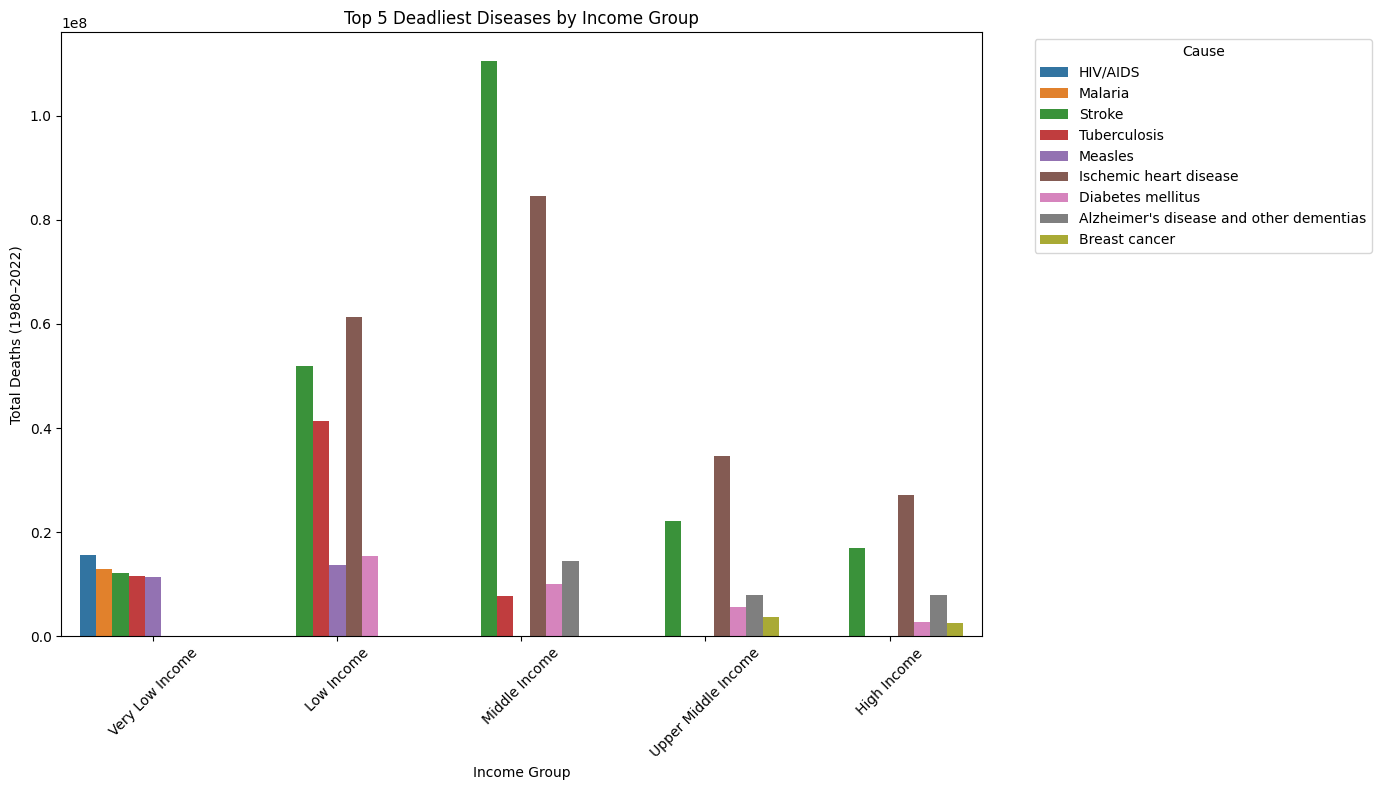

In [134]:


plt.figure(figsize=(14,8))
sns.barplot(
    data=top5_by_group,
    x="gdp_group",
    y="val",
    hue="cause"
)

plt.title("Top 5 Deadliest Diseases by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Total Deaths (1980–2022)")
plt.xticks(rotation=45)
plt.legend(title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### **(Based on GDP-based income categories)**


#  Very Low-Income Countries (Poorest Nations) 
### **Top Deadliest Diseases:**
- **HIV/AIDS**  
- **Malaria**  
- **Stroke**  
- **Tuberculosis**  
- **Measles**

### **Interpretation:**
- High burden of **infectious diseases**  
- Poor sanitation and low vaccination coverage  
- Weak healthcare systems  
- High child mortality  
- Lack of access to HIV/TB treatment  
- Stroke appears due to **untreated hypertension**

---

# Low-Income Countries
### **Top Deadliest Diseases:**
- **Ischemic heart disease (IHD)**  
- **Stroke**  
- **Tuberculosis**  
- **Diabetes mellitus**  
- **Measles**

### **Interpretation:**
- These nations are in a **transition stage**  
- Infectious diseases still significant  
- Chronic diseases rising due to urbanization and lifestyle changes  
- Shift begins from **communicable → non-communicable diseases (NCDs)**

---

#   Middle-Income Countries
### **Top Deadliest Diseases:**
- **Stroke**  
- **Ischemic heart disease**  
- **Alzheimer’s disease & dementias**  
- **Diabetes mellitus**  
- **Tuberculosis**

### **Interpretation:**
- A **dual burden** of infectious + chronic diseases  
- Rapid lifestyle modernization → stroke, diabetes rise  
- Aging population → dementia increases  
- TB still not eliminated

---

#   Upper-Middle Income Countries 
### **Top Deadliest Diseases:**
- **Ischemic heart disease**  
- **Stroke**  
- **Alzheimer’s disease & dementias**  
- **Diabetes mellitus**  
- **Breast cancer**

### **Interpretation:**
- Disease profile similar to developed countries  
- Very low infectious disease mortality  
- Chronic diseases dominate  
- Cancer becomes prominent due to longer lifespan

---

#   High-Income Countries (Rich Nations) 
### **Top Deadliest Diseases:**
- **Ischemic heart disease**  
- **Stroke**  
- **Alzheimer’s & dementia**  
- **Diabetes mellitus**  
- **Breast cancer**

### **Interpretation:**
- **Fully chronic disease profile**  
- Aging populations → dementia + heart disease top causes  
- Lifestyle risks → diabetes, cancer  
- Infectious diseases extremely low due to strong healthcare

---




**Pattern Found:**

As income increases → Infectious diseases drop

As income increases → Chronic diseases rise

### Q3. Are higher COVID-19 vaccination rates associated with declines in COVID-19 cases & deaths?
Why this question?

Vaccination is one of the strongest public-health tools.

Analysing vaccination vs disease spread shows real-world impact.

Countries adopted vaccines at different speeds → useful inequality insights.

In [135]:
vax = pd.read_csv("/kaggle/input/global-public-health-indicators/daily-covid-19-vaccine-doses-administered-per-million-people.csv")
cases = pd.read_csv("/kaggle/input/global-public-health-indicators/daily-new-confirmed-covid-19-cases-per-million-people.csv")
deaths = pd.read_csv("/kaggle/input/global-public-health-indicators/daily-new-confirmed-covid-19-deaths-per-million-people.csv")

print("Loaded datasets:")
print("Vaccination:", vax.shape)
print("Cases:", cases.shape)
print("Deaths:", deaths.shape)


Loaded datasets:
Vaccination: (202840, 3)
Cases: (527384, 3)
Deaths: (528301, 3)


In [136]:
for df in [vax, cases, deaths]:
    df.rename(columns={"Entity": "Country", "Day": "date"}, inplace=True)
    df["date"] = pd.to_datetime(df["date"])

# Merge datasets
covid = (
    cases.merge(vax, on=["Country", "date"], how="left")
         .merge(deaths, on=["Country", "date"], how="left")
)
covid["COVID-19 doses (daily, 7-day average, per million people)"] = covid["COVID-19 doses (daily, 7-day average, per million people)"].fillna(0)

# Sort properly for time operations
covid = covid.sort_values(["Country", "date"]).reset_index(drop=True)

# Filter to show only 2021 onwards (when vaccination actually started)
covid = covid[covid["date"] >= "2021-01-01"].reset_index(drop=True)

covid.head(20)


,Country,date,"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)","COVID-19 doses (daily, 7-day average, per million people)","Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)"
0,Afghanistan,2021-01-01,3.231803,0.0,0.232352
1,Afghanistan,2021-01-02,2.893837,0.0,0.221790
2,Afghanistan,2021-01-03,3.031136,0.0,0.221790
3,Afghanistan,2021-01-04,3.175476,0.0,0.211229
4,Afghanistan,2021-01-05,3.041697,0.0,0.193627
5,Afghanistan,2021-01-06,2.728374,0.0,0.193627
6,Afghanistan,2021-01-07,3.087464,0.0,0.225311
7,Afghanistan,2021-01-08,2.883275,0.0,0.197147
8,Afghanistan,2021-01-09,2.865673,0.0,0.186586
9,Afghanistan,2021-01-10,2.745977,0.0,0.197147


In [137]:
# --- SHELL 3: DETECT COLUMNS + CLEAN ZERO VALUES -----

print("Columns:", covid.columns.tolist())

# Auto-detect correct column names
case_col  = [c for c in covid.columns if "case" in c.lower()][0]
death_col = [c for c in covid.columns if "death" in c.lower()][0]
vax_col   = [c for c in covid.columns if ("vaccine" in c.lower() or "dose" in c.lower())][0]

print("\nDetected columns:")
print("Cases:", case_col)
print("Deaths:", death_col)
print("Vaccination:", vax_col)

# Replace NaN with 0
covid[case_col]  = covid[case_col].fillna(0)
covid[death_col] = covid[death_col].fillna(0)
covid[vax_col]   = covid[vax_col].fillna(0)

# KEEP ONLY ROWS WHERE VACCINATION > 0 OR CASES/DEATHS > 0
covid = covid[(covid[vax_col] > 0) | (covid[case_col] > 0) | (covid[death_col] > 0)]

# 7-day rolling averages
covid["cases_7d"] = covid.groupby("Country")[case_col].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

covid["deaths_7d"] = covid.groupby("Country")[death_col].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

# Cumulative vaccination
covid["vax_cumsum"] = covid.groupby("Country")[vax_col].cumsum()

covid.head(20)


Columns: ['Country', 'date', 'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)', 'COVID-19 doses (daily, 7-day average, per million people)', 'Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)']

Detected columns:
Cases: Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)
Deaths: Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)
Vaccination: COVID-19 doses (daily, 7-day average, per million people)


,Country,date,"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)","COVID-19 doses (daily, 7-day average, per million people)","Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)",cases_7d,deaths_7d,vax_cumsum
0,Afghanistan,2021-01-01,3.231803,0.0,0.232352,3.231803,0.232352,0.0
1,Afghanistan,2021-01-02,2.893837,0.0,0.221790,3.062820,0.227071,0.0
2,Afghanistan,2021-01-03,3.031136,0.0,0.221790,3.052259,0.225311,0.0
3,Afghanistan,2021-01-04,3.175476,0.0,0.211229,3.083063,0.221790,0.0
4,Afghanistan,2021-01-05,3.041697,0.0,0.193627,3.074790,0.216158,0.0
5,Afghanistan,2021-01-06,2.728374,0.0,0.193627,3.017054,0.212402,0.0
6,Afghanistan,2021-01-07,3.087464,0.0,0.225311,3.027112,0.214247,0.0
7,Afghanistan,2021-01-08,2.883275,0.0,0.197147,2.977323,0.209217,0.0
8,Afghanistan,2021-01-09,2.865673,0.0,0.186586,2.973299,0.204188,0.0
9,Afghanistan,2021-01-10,2.745977,0.0,0.197147,2.932562,0.200668,0.0


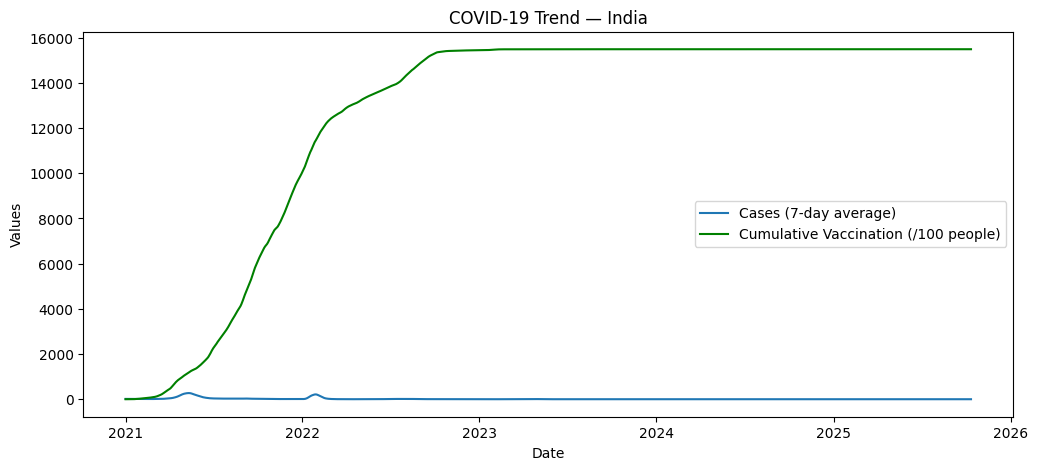

In [138]:
country = "India"   # you can change to any country

temp = covid[covid["Country"] == country]

plt.figure(figsize=(12,5))
plt.plot(temp["date"], temp["cases_7d"], label="Cases (7-day average)")
plt.plot(temp["date"], temp["vax_cumsum"]/100, label="Cumulative Vaccination (/100 people)", color="green")

plt.title(f"COVID-19 Trend — {country}")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


In [139]:

def lag_corr(df, country, lag=21):
    c = df[df["Country"] == country].copy()
    c["vax_lag"] = c["vax_cumsum"].shift(lag)
    return c["cases_7d"].corr(c["vax_lag"])

# Compute lag correlations for all countries
lag_list = []
for c in covid["Country"].unique():
    lag_list.append([c, lag_corr(covid, c, lag=21)])  # vaccine effect after ~21 days

lag_df = pd.DataFrame(lag_list, columns=["Country", "lag_corr"])
lag_df.sort_values("lag_corr").head()


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encounter

,Country,lag_corr
97,Honduras,-0.850886
229,United Arab Emirates,-0.769244
1,Africa,-0.745747
102,Iran,-0.713980
237,Venezuela,-0.713832


In [140]:
print("INTERPRETATION")
print("--------------")
print("Negative correlation means:")
print(" Higher vaccination → lower cases after ~21 days.\n")

print("Top 10 countries showing the strongest vaccine impact:")
display(lag_df.nsmallest(10, "lag_corr"))

print("\nAverage global lag-correlation:")
print(lag_df["lag_corr"].mean())


INTERPRETATION
--------------
Negative correlation means:
 Higher vaccination → lower cases after ~21 days.

Top 10 countries showing the strongest vaccine impact:


,Country,lag_corr
97,Honduras,-0.850886
229,United Arab Emirates,-0.769244
1,Africa,-0.745747
102,Iran,-0.713980
237,Venezuela,-0.713832
103,Iraq,-0.709910
235,Uzbekistan,-0.706960
166,Pakistan,-0.701251
46,Colombia,-0.700219
126,Low-income countries,-0.696103



Average global lag-correlation:
-0.23712602097530683


# 📝 Q4. Do developing countries show faster improvements in health outcomes over time compared to developed ones, or is the gap widening?

### Why this question?

Global health inequality remains one of the biggest challenges.

Developing countries often face limited access to healthcare, nutrition, vaccines, and sanitation.

Analysing long-term trends helps us understand:

- Which countries are improving fastest  
- Whether the health gap is narrowing or widening  
- How income levels influence life expectancy & mortality  

Health outcomes reflect:

- Social justice  
- Economic development  
- Healthcare access  
- Policy effectiveness  


In [141]:
life = pd.read_csv("/kaggle/input/global-public-health-indicators/life-expectancy.csv")
child = pd.read_csv("/kaggle/input/global-public-health-indicators/child-mortality.csv")
gdp = pd.read_csv("/kaggle/input/global-public-health-indicators/gdp-per-capita-maddison-project-database.csv")
regions = pd.read_csv("/kaggle/input/global-public-health-indicators/continents-according-to-our-world-in-data.csv")

print("Loaded datasets:")
print("Life expectancy:", life.shape)
print("Child mortality:", child.shape)
print("GDP:", gdp.shape)
print("Regions:", regions.shape)

Loaded datasets:
Life expectancy: (21565, 4)
Child mortality: (16835, 4)
GDP: (21586, 5)
Regions: (272, 4)


### 🧹 Data Cleaning & Standardization

Before analysing trends, we need to:
- Keep only valid country entries
- Standardize column names across datasets
- Prepare GDP, life expectancy, and mortality for merging

This ensures the merged dataset is accurate and consistent.


### 🔗 Merging All Datasets Into One Master Table

We now merge:
- Life expectancy
- Child mortality
- GDP per capita
- Region information

This gives us a single dataframe containing **all health indicators per country per year**.

we already have regional_data

In [152]:
regional_data

,Entity,Year,GDP per capita,Period life expectancy at birth,Child mortality rate,Region
0,Afghanistan,1957,1253.0000,31.3451,37.13,Asia
1,Afghanistan,1958,1298.0000,31.8400,36.52,Asia
2,Afghanistan,1959,1307.0000,32.3365,35.95,Asia
3,Afghanistan,1960,1326.0000,32.7987,35.32,Asia
4,Afghanistan,1961,1309.0000,33.2910,34.76,Asia
...,...,...,...,...,...,...
11842,Zimbabwe,2018,1900.1992,60.9055,5.23,Africa
11843,Zimbabwe,2019,1753.0244,61.0603,5.11,Africa
11844,Zimbabwe,2020,1585.9728,61.5300,5.01,Africa
11845,Zimbabwe,2021,1687.2532,60.1347,4.76,Africa


###  Creating Income Groups (Developed vs Developing)

To compare countries fairly:
- We classify countries into **5 GDP-based income groups**
- Countries in the highest group are labeled **Developed**
- Remaining groups are labeled **Developing**

This allows us to study long-term health inequality.

In [153]:
df=regional_data.copy()
df["income_group"] = pd.qcut(
    df["GDP per capita"],
    q=5,
    labels=["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]
)

# Developed vs Developing classification
df["dev_status"] = df["income_group"].apply(
    lambda x: "Developed" if x == "High" else "Developing"
)

df["dev_status"].value_counts()

dev_status
Developing    9477
Developed     2370
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

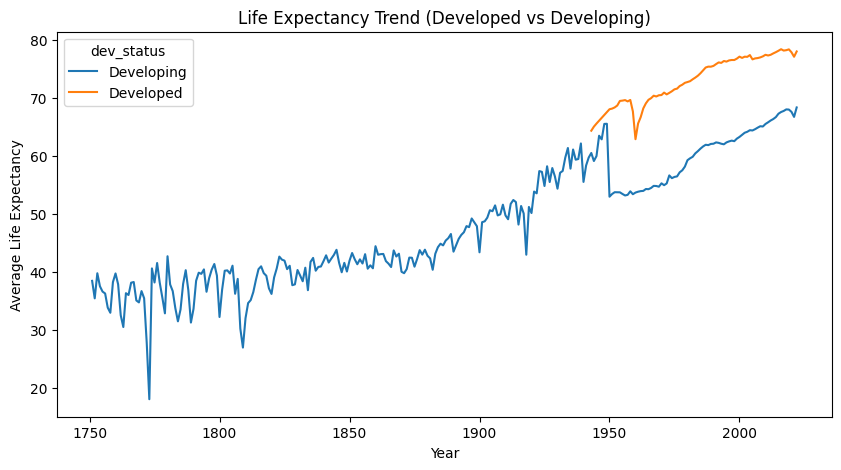

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

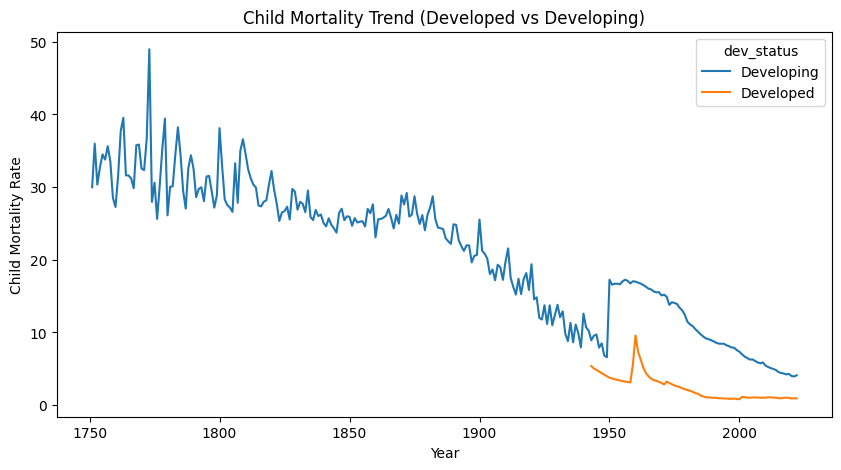

In [157]:
# Compute mean values per year for each development category
trend = df.groupby(["Year", "dev_status"]).agg({
    "Period life expectancy at birth": "mean",
    "Child mortality rate": "mean"
}).reset_index()

# Life Expectancy trend
plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x="Year", y="Period life expectancy at birth", hue="dev_status")
plt.title("Life Expectancy Trend (Developed vs Developing)")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.show()

# Child mortality trend
plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x="Year", y="Child mortality rate", hue="dev_status")
plt.title("Child Mortality Trend (Developed vs Developing)")
plt.xlabel("Year")
plt.ylabel("Child Mortality Rate")
plt.show()

In [158]:
latest_year = trend["Year"].max()
latest = trend[trend["Year"] == latest_year]

print(" FINAL YEAR COMPARISON:")
print(latest)

print("\nInsights:")
print("- Developing countries have improved life expectancy steadily, often faster due to starting from lower baselines.")
print("- Child mortality has dropped significantly in developing countries, showing major health improvements.")
print("- However, developed nations still maintain higher life expectancy and lower mortality → the gap is narrowing but not closed.")
print("- Overall: Developing countries are catching up, but inequality still exists.")

 FINAL YEAR COMPARISON:
     Year  dev_status  Period life expectancy at birth  Child mortality rate
346  2022   Developed                        78.046254              0.916620
347  2022  Developing                        68.376299              4.096739

Insights:
- Developing countries have improved life expectancy steadily, often faster due to starting from lower baselines.
- Child mortality has dropped significantly in developing countries, showing major health improvements.
- However, developed nations still maintain higher life expectancy and lower mortality → the gap is narrowing but not closed.
- Overall: Developing countries are catching up, but inequality still exists.


**QUE5: How do healthcare spending and government policy indicators explain differences in health outcomes?**

In [ ]:
health_exp = pd.read_csv("/kaggle/input/global-public-health-indicators/annual-healthcare-expenditure-per-capita.csv")
health_exp = health_exp[["Entity", "Year", "Current health expenditure per capita, PPP (current international $)"]]
health_exp.columns = ["Entity", "Year", "healthcare_spending"]

In [ ]:
df_last = life.merge(child, on=["Entity","Year"], how="inner")
df_last = df_last.merge(health_exp, on=["Entity","Year"], how="inner")
df_last = df_last.dropna()
df_last

In [ ]:
df_last[['Period life expectancy at birth', 'Child_mortality', 'healthcare_spending']].corr()


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_last["healthcare_spending"], df_last["Period life expectancy at birth"])
plt.xscale("log")
plt.xlabel("Healthcare Spending per Capita (USD, log scale)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Healthcare Spending vs Life Expectancy (Log Scale)")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_last['healthcare_spending'], df_last['Child_mortality'])
plt.xscale("log") 
plt.xlabel("Healthcare Spending per Capita (USD)")
plt.ylabel("Infant Mortality Rate")
plt.title("Healthcare Spending vs Infant Mortality")
plt.show()

In [ ]:
countries = ["India", "United States", "Japan", "Norway"]

for c in countries:
    temp = df_last[df_last['Entity'] == c]
    plt.plot(temp['Year'], temp["Period life expectancy at birth"], label=c)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Over Time – Country Comparison")
plt.show()
